In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                                                                
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from argopy import DataFetcher as ArgoDataFetcher
from argopy import IndexFetcher as ArgoIndexFetcher

# import sys, os
# sys.path.insert(0, "/Users/ericrehm/src/euroargodev/argopy/argopy/")

import argopy
from argopy.options import OPTIONS
print("argopy:", argopy.__version__, 
        "\nsrc:", argopy.__file__, 
        "\noptions:", OPTIONS)
# argopy.show_versions()

argopy: 0.1.7 
src: /Users/ericrehm/opt/anaconda2/envs/py3/lib/python3.8/site-packages/argopy/__init__.py 
options: {'src': 'erddap', 'local_ftp': '.', 'dataset': 'phy', 'cachedir': '/Users/ericrehm/.cache/argopy', 'mode': 'standard', 'api_timeout': 60}


In [3]:
argo_loader = ArgoDataFetcher()
# ds = ArgoDataFetcher(src='erddap').region([-75, -45, 20, 30, 0, 100, '2011-01', '2011-02']).to_xarray()
wmoId = 6903550
ds = ArgoDataFetcher(src='erddap').profile(wmoId, 34).to_xarray().to_dataframe()

In [4]:
ds.head()

,CONFIG_MISSION_NUMBER,CYCLE_NUMBER,DATA_MODE,DIRECTION,PLATFORM_NUMBER,POSITION_QC,PRES,PRES_QC,PSAL,PSAL_QC,TEMP,TEMP_QC,TIME_QC,LATITUDE,LONGITUDE,TIME
N_POINTS,,,,,,,,,,,,,,,,
0,4,34,R,A,6903550,1,2.5,1,35.044998,1,5.670,1,1,69.669755,3.950463,2019-10-28 11:30:00
1,4,34,R,A,6903550,1,3.5,1,35.044998,1,5.670,1,1,69.669755,3.950463,2019-10-28 11:30:00
2,4,34,R,A,6903550,1,4.6,1,35.044998,1,5.670,1,1,69.669755,3.950463,2019-10-28 11:30:00
3,4,34,R,A,6903550,1,5.5,1,35.044998,1,5.670,1,1,69.669755,3.950463,2019-10-28 11:30:00
4,4,34,R,A,6903550,1,6.5,1,35.044998,1,5.671,1,1,69.669755,3.950463,2019-10-28 11:30:00


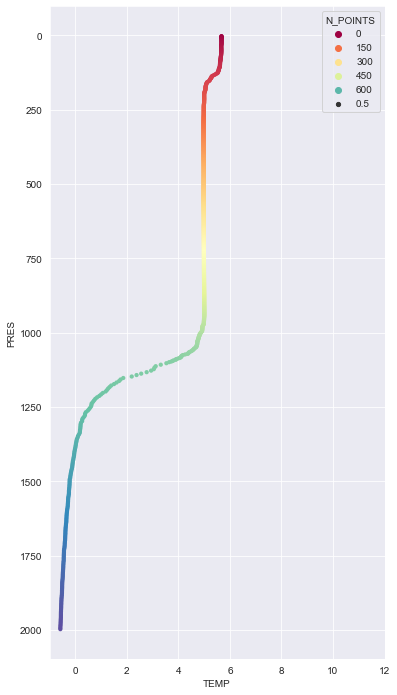

In [19]:
sns.set_style("darkgrid")

wmoId = 6903550
ds = argo_loader.profile(wmoId, 34).to_xarray()
df0 = ds.to_dataframe()
df1 = ds.argo.point2profile().to_dataframe()
# df2 = argo_loader.profile(wmoId, np.arange(12,45)).to_xarray().argo.point2profile().to_dataframe()
# print(df1)

# cmap = sns.color_palette("Spectral", as_cmap=True)
fig = plt.figure(figsize=(6,12))
h = sns.scatterplot(data=df0,x='TEMP',y='PRES',hue='N_POINTS', palette='Spectral', edgecolor='none', size=0.5)
h.axes.invert_yaxis()
plt.xlim((-1,12))
plt.show()



In [ ]:
# Get all of the float's profiles in a data frame
# df2 = argo_loader.profile(wmoId, np.arange(12,15)).to_xarray().argo.point2profile().to_dataframe()
df2 = argo_loader.float(wmoId).to_xarray().argo.point2profile().to_dataframe()

# Pesky plotting details: plot each profile in a different color by date
fig = plt.figure(figsize=(6,12))
h = sns.relplot(data=df2, x="TEMP", y="PRES", hue="TIME", palette='Spectral', kind='line')
ax0 = plt.gca()
ax0.invert_yaxis()
plt.xlim((-1,12))
hl,l = ax0.get_legend_handles_labels()
l = [e[0:10] for e in l]  # date (chop off time)

# Remove the default legend and replace it with entry every 6 profiles (30 d)
h._legend.remove()
skip=6
# skip=1
plt.legend(hl[0:-1:skip], l[0:-1:skip], loc='right', frameon=False, bbox_to_anchor=(1.35, 0.5))
plt.show()

# ds = argo_loader.profile(wmoId, np.arange(12,45)).to_xarray()
# ds = argo_loader.profile(wmoId, [1,12]).to_xarray()

In [84]:
df2.head()

CONFIG_MISSION_NUMBER  CYCLE_NUMBER DATA_MODE DIRECTION  \
N_LEVELS N_PROF                                                            
0        0                           1             1         R         A   
         1                           1             2         R         A   
         2                           2             3         R         A   
         3                           3             4         R         A   
         4                           3             5         R         A   

                 PLATFORM_NUMBER  POSITION_QC  PRES  PRES_QC       PSAL  \
N_LEVELS N_PROF                                                           
0        0               6903550            1   2.5        1  35.074001   
         1               6903550            1   2.4        1  35.076000   
         2               6903550            1   2.6        1  35.075001   
         3               6903550            1   2.5        1  35.070000   
         4               6903550            1   2.5        1  35.063999   

                 PSAL_QC   TEMP  TEMP_QC  TIME_QC   LATITUDE  LONGITUDE  \
N_LEVELS N_PROF                                                           
0        0             1  5.013        1        1  70.234007   1.338965   
         1             1  5.120        1        1  70.307170   1.125112   
         2             1  5.056        1        1  70.326967   1.196560   
         3             1  5.068        1        1  70.208137   1.676447   
         4             1  5.169        1        1  70.095422   2.084832   

                               TIME  
N_LEVELS N_PROF                      
0        0      2019-05-22 11:19:00  
         1      2019-05-24 11:18:00  
         2      2019-05-26 11:21:00  
         3      2019-05-31 11:23:00  
         4      2019-06-05 11:10:00

In [13]:

index_loader = ArgoIndexFetcher()
# collection of floats:
# idx=index_loader.float([6902746, 6902747, 6902757, 6902766])
#Local ftp backend
#index_loader = ArgoIndexFetcher(backend='localftp',path_ftp='/path/to/your/argo/ftp/',index_file='ar_index_global_prof.txt')
idx=index_loader.float([6902910,6903006,6903546,6903550])   

# then you can see you index as a pandas dataframe or a xarray dataset :
df = idx.to_dataframe()
# idx.to_xarray()


,file,date,longitude,latitude,ocean,profiler_code,institution_code,date_update,wmo,institution,profiler
0,coriolis/6903546/profiles/D6903546_002.nc,2018-06-10 20:24:00,-4.574,73.996,A,844,IF,2019-08-21 16:13:05,6903546,"Ifremer, France","Arvor, Seabird conductivity sensor"
1,coriolis/6903546/profiles/D6903546_003.nc,2018-06-20 20:20:00,-5.476,74.326,A,844,IF,2019-08-21 16:13:05,6903546,"Ifremer, France","Arvor, Seabird conductivity sensor"
2,coriolis/6903546/profiles/D6903546_004.nc,2018-06-30 20:22:00,-5.034,74.571,A,844,IF,2019-08-21 16:13:05,6903546,"Ifremer, France","Arvor, Seabird conductivity sensor"
3,coriolis/6903546/profiles/D6903546_005.nc,2018-07-10 20:24:00,-5.481,74.791,A,844,IF,2019-08-21 16:13:05,6903546,"Ifremer, France","Arvor, Seabird conductivity sensor"
4,coriolis/6903546/profiles/D6903546_006.nc,2018-07-20 20:31:00,-5.216,74.832,A,844,IF,2019-08-21 16:13:05,6903546,"Ifremer, France","Arvor, Seabird conductivity sensor"


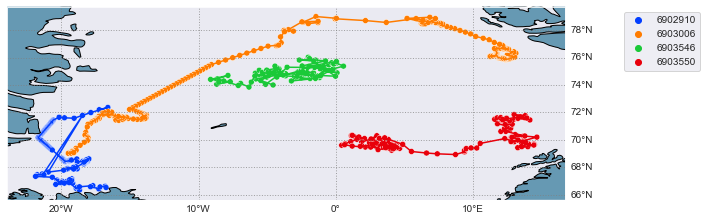

In [14]:
idx.plot('trajectory')
df.head()

In [12]:
argopy.dashboard(6903550)
